In [23]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])
(use '(incanter core stats charts io))
(print (concat (sample-normal 10 :mean 10) (sample-normal 10) (sample-normal 10)))

(9.994802192013871 10.81766972538744 10.346627906266622 10.445393671495017 9.707226171816188 10.682698116086678 9.84194482393435 9.321522585864102 11.44147789901109 10.965325471251857 0.9215547264047439 0.17796789028025714 -0.6386816212588637 -0.23778573595113212 -0.4960168423345347 0.7829332464387482 1.4134776971012217 -0.8799272799435309 0.6218820402217815 -1.3926134032841821 -1.3086261491559463 -0.5418408638907957 -0.3328229859097158 -0.4245112193214904 -0.9782168856018679 -0.522534471222005 1.016897169638461 1.1667721066354282 -0.6101623647942941 0.8779414525953261)

Syntax error (IllegalArgumentException) compiling at (REPL:5:66).
No value supplied for key: 5


class clojure.lang.Compiler$CompilerException: 

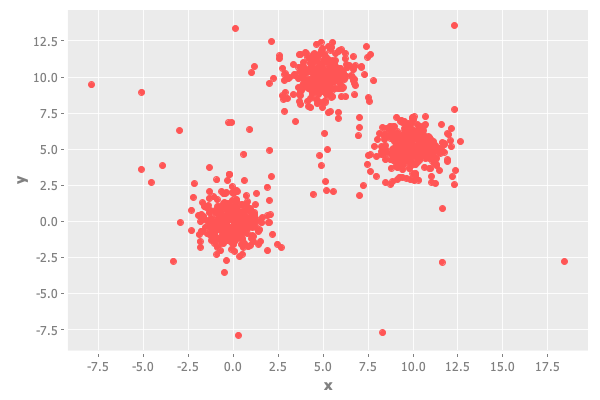

In [54]:
(def xs (concat (sample-normal 300 :mean 10) (sample-normal 300) (sample-normal 300 :mean 5) (sample-normal 50 :mean 4 :sd 5)))
(def ys (concat (sample-normal 300 :mean 5) (sample-normal 300) (sample-normal 300 :mean 10) (sample-normal 50 :mean 4 :sd 5)))
(def pts (map vector xs ys))
(-> (scatter-plot xs 
                  ys 
                  :x-label "x" :y-label "y")
    (.createBufferedImage 600 400))

In [55]:
(defn distance
  [pt1 pt2]
  (Math/sqrt (reduce + (map #(* % %) (map - pt1 pt2)))))

(defn knn-pt
  [k pts pt]
  (let [pts (rest (sort-by #(distance % pt) pts))]
    (rest (take (inc k) pts))))

(defn knn-map
  [k pts]
  (reduce (fn [coll pt]
            (assoc coll pt (knn-pt k pts pt)))
          {}
          pts))
(def k 5)
(def knns (knn-map k pts))

(def kth-distance (map (fn [[k vs]] (distance k (last vs))) knns))

#'user/kth-distance

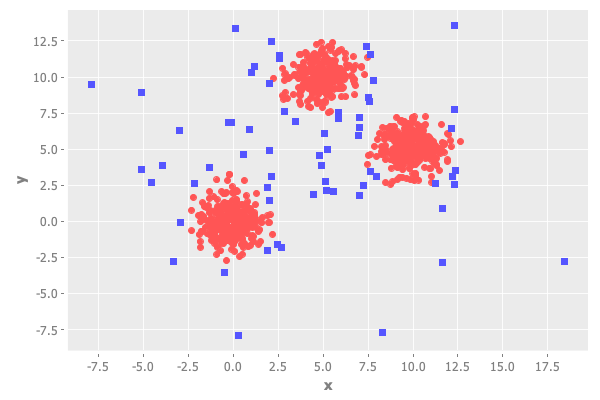

In [60]:
(-> (scatter-plot (map first (keys knns)) 
                  (map last (keys knns)) 
                  :x-label "x" :y-label "y" :group-by (map #(> % 1.0) kth-distance))
    (.createBufferedImage 600 400))

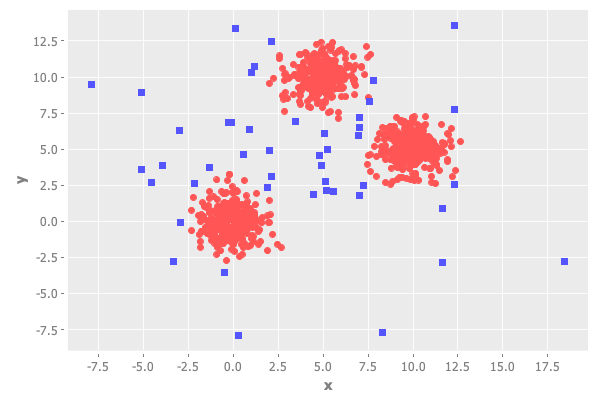

In [65]:
(def tnn (map (fn [[k vs]] (mean (map #(distance % k) vs))) knns))
(-> (scatter-plot (map first (keys knns)) 
                  (map last (keys knns)) 
                  :x-label "x" :y-label "y" :group-by (map #(> % 1.0) tnn))
    (.createBufferedImage 600 400))

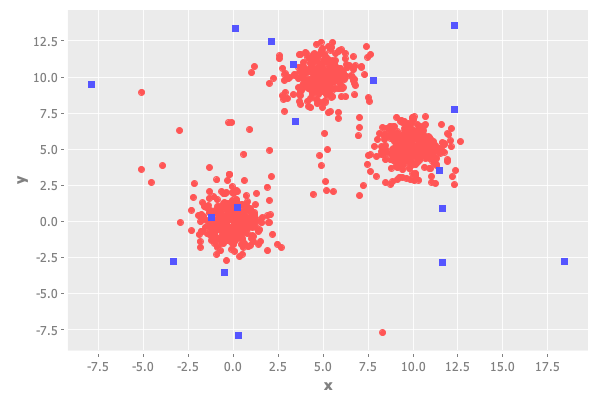

In [75]:
(defn inner-distance 
    [pts]
    (let [k (count pts)
          sum-dist (reduce (fn [s pt]
                               (reduce + s (map #(distance pt %) pts))) 0 pts)]
        (/ sum-dist (* k (dec k)))))
(def inner-distances (map inner-distance (vals knns)))
(def ldofs (map / tnn inner-distances))
(-> (scatter-plot (map first (keys knns)) 
                  (map last (keys knns)) 
                  :x-label "x" :y-label "y" :group-by (map #(> % 1.5) ldofs))
    (.createBufferedImage 600 400))